## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Get the data

In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
### Check the head of loan_data

In [4]:
loan_data.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Checking data cleanness

In [5]:
loan_data.isnull().sum()


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
loan_data.duplicated().sum()


np.int64(0)

In [7]:
loan_data[['person_age', 'person_income']].describe()


,person_age,person_income
count,45000.000000,4.500000e+04
mean,27.764178,8.031905e+04
std,6.045108,8.042250e+04
min,20.000000,8.000000e+03
25%,24.000000,4.720400e+04
50%,26.000000,6.704800e+04
75%,30.000000,9.578925e+04
max,144.000000,7.200766e+06


In [8]:
loan_data.dtypes


person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

### Use info and describe() on load_data

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
## Exploratory Data Analysis
### Let's use seaborn to explore the data!
### Creating plots
### Creating a histogram of the age

<Axes: ylabel='Frequency'>

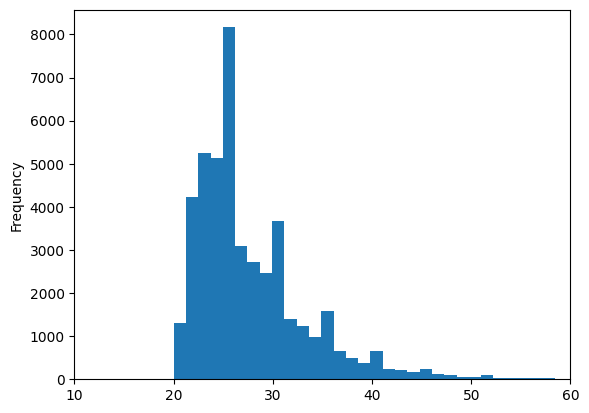

In [12]:
loan_data['person_age'].plot.hist(bins=100, xlim=(10,60))

## Create a jointplot showing Income versus Age.

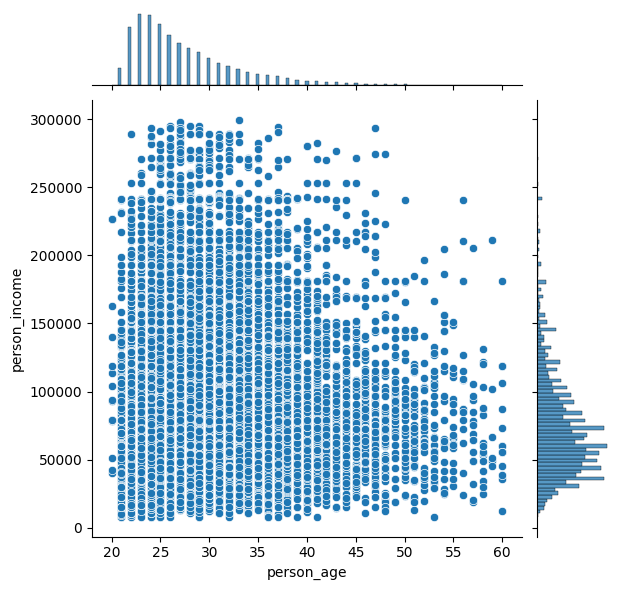

In [13]:
# Filter out outliers for better visualization
filtered_data = loan_data[(loan_data['person_age'] <= 60) & (loan_data['person_income'] <= 300000)]

# Create jointplot
sns.jointplot(x='person_age', y='person_income', data=filtered_data, kind='scatter')
plt.show()

### Create a jointplot showing the kde distributions of credit_score vs person_age

In [14]:
# sns.jointplot(x='person_age',y='credit_score', data=filtered_data, kind='kde',color='red')


## Create a jointplot of 'person_income' vs 'loan_amnt'

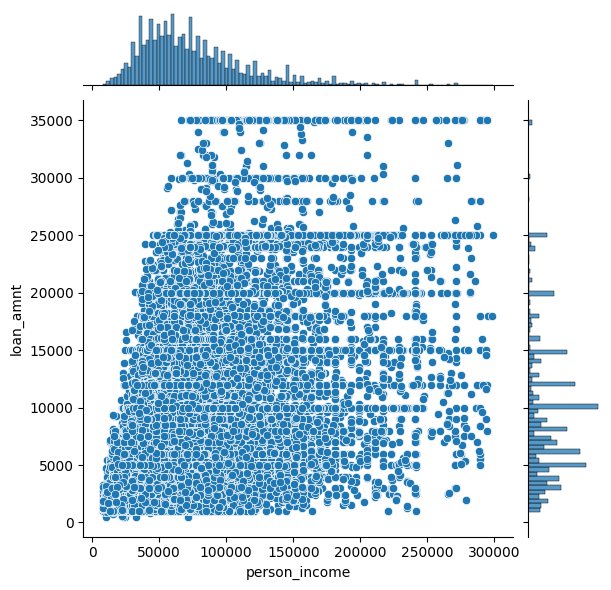

In [15]:
sns.jointplot(x='person_income',y='loan_amnt', data=filtered_data)

## Data Cleaning

In [16]:
### male: 1, female: 0

In [17]:
# Map gender to binary
loan_data['person_gender'] = loan_data['person_gender'].map({'male': 1, 'female': 0})


In [18]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### previous load defauntls Yes: 1, No: 0

In [19]:
loan_data['previous_loan_defaults_on_file']=loan_data['previous_loan_defaults_on_file'].map({'Yes':1, 'No': 0})

In [20]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [21]:
unique_values = loan_data['loan_intent'].unique()
unique_count = loan_data['loan_intent'].nunique()

print("Unique values:", unique_values)
print("Number of unique values:", unique_count)

Unique values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Number of unique values: 6


In [22]:
## Loan_intent 
### 'PERSONAL' : 1
### 'EDUCATION' : 2
### 'MEDICAL' : 3
### 'VENTURE' : 4
### 'HOMEIMPROVEMENT' : 5
### 'DEBTCONSOLIDATION' : 6

In [23]:
loan_data['loan_intent']=loan_data['loan_intent'].map({'PERSONAL':1, 'EDUCATION': 2, 'MEDICAL':3, 'VENTURE': 4, 'HOMEIMPROVEMENT':5, 'DEBTCONSOLIDATION': 6})

In [24]:
unique_values = loan_data['person_education'].unique()
unique_count = loan_data['person_education'].nunique()

print("Unique values:", unique_values)
print("Number of unique values:", unique_count)

Unique values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Number of unique values: 5


In [25]:
## person_education
### 'High School':1
### 'Bachelor': 2
### 'Master':3
### 'Associate': 4
### 'Doctorate':5

In [26]:
loan_data['person_education']=loan_data['person_education'].map({'High School':1, 'Bachelor': 2, 'Master':3, 'Associate': 4, 'Doctorate':5})

In [27]:
unique_values = loan_data['person_home_ownership'].unique()
unique_count = loan_data['person_home_ownership'].nunique()

print("Unique values:", unique_values)
print("Number of unique values:", unique_count)

Unique values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Number of unique values: 4


In [28]:
## person_home_ownership
### 'RENT':1
### 'OWN': 2
### 'MORTGAGE':3
### 'OTHER': 4

In [29]:
loan_data['person_home_ownership']=loan_data['person_home_ownership'].map({'RENT':1, 'OWN': 2, 'MORTGAGE':3, 'OTHER': 4})

In [30]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,0,1


## Logistic Regression 
### Not it's time to do a train test split, and train out model

In [31]:
loan_data.columns.tolist()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'loan_status']

In [32]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached scipy-1.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [33]:

## Split the data into training set and testing set using train_test_split
from sklearn.model_selection import train_test_split

X= loan_data[['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']]

y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train and fit a logistic regression model on the training set

In [34]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/gasim/Desktop/ml/ai-assignment2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicitions and Evaluaitons
### Now we predict values for the testing data.

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
## Create a classification report for the model

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10493
           1       0.73      0.50      0.59      3007

    accuracy                           0.85     13500
   macro avg       0.80      0.72      0.75     13500
weighted avg       0.84      0.85      0.84     13500

[[9934  559]
 [1515 1492]]
